In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv("../data/cleaned_train_car_data.csv")

In [15]:
train_df, val_df = train_test_split(data, test_size=0.2,random_state=42)

In [ ]:
train_df = train_df.set_index('Index')
val_df = val_df.set_index('Index')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 3151 to 459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2565 non-null   object 
 1   milage          2565 non-null   int64  
 2   fuel_type       2468 non-null   object 
 3   transmission    2565 non-null   object 
 4   ext_col         2565 non-null   object 
 5   int_col         2565 non-null   object 
 6   accident        2488 non-null   object 
 7   clean_title     2182 non-null   object 
 8   price           2565 non-null   int64  
 9   car_age         2565 non-null   int64  
 10  horsepower      2043 non-null   float64
 11  engine_size     2333 non-null   float64
 12  cylinder_count  1967 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 280.5+ KB


## Handling Missing Values

In [26]:
percent_missing = 100*train_df.isna().sum()/len(train_df)
percent_missing[percent_missing>0]

fuel_type          3.781676
accident           3.001949
clean_title       14.931774
horsepower        20.350877
engine_size        9.044834
cylinder_count    23.313840
dtype: float64

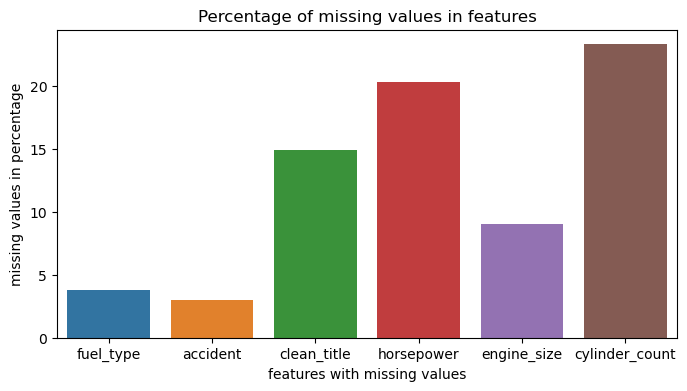

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x=percent_missing[percent_missing>0].index,y=percent_missing[percent_missing>0])
plt.xlabel("features with missing values")
plt.ylabel("missing values in percentage")
plt.title("Percentage of missing values in features")
plt.show()

In [28]:
train_df['fuel_type'] = train_df['fuel_type'].fillna("Unknown")

In [29]:
train_df['accident'] = train_df['accident'].fillna("Unknown")

In [30]:
train_df['clean_title'] = train_df['clean_title'].fillna("Unknown")

<Axes: xlabel='horsepower', ylabel='Count'>

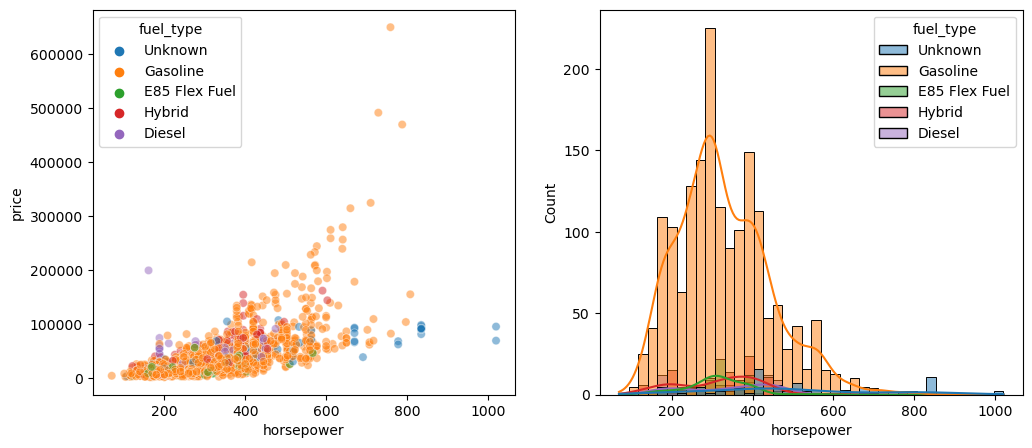

In [78]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='horsepower',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.histplot(x='horsepower',data=train_df,kde=True,hue='fuel_type',ax=axes[1])

<Axes: xlabel='engine_size', ylabel='Count'>

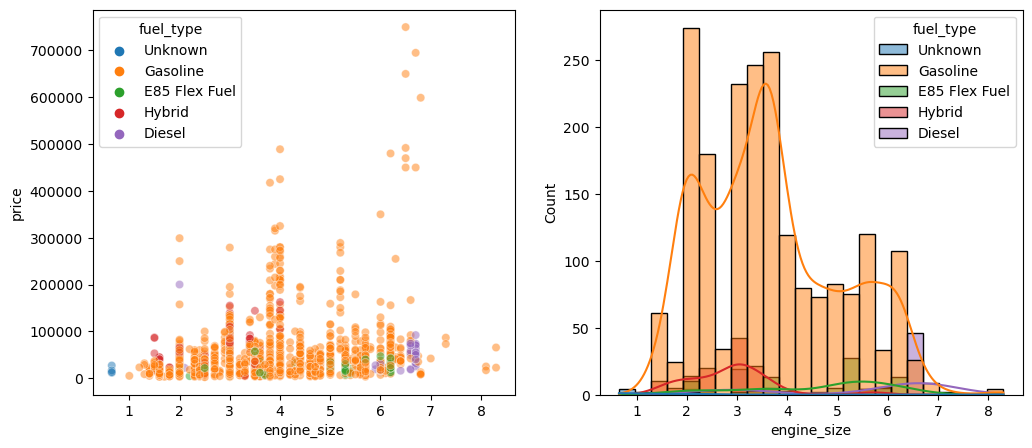

In [79]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='engine_size',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.histplot(x='engine_size',data=train_df,kde=True,hue='fuel_type',ax=axes[1])

<Axes: xlabel='cylinder_count', ylabel='price'>

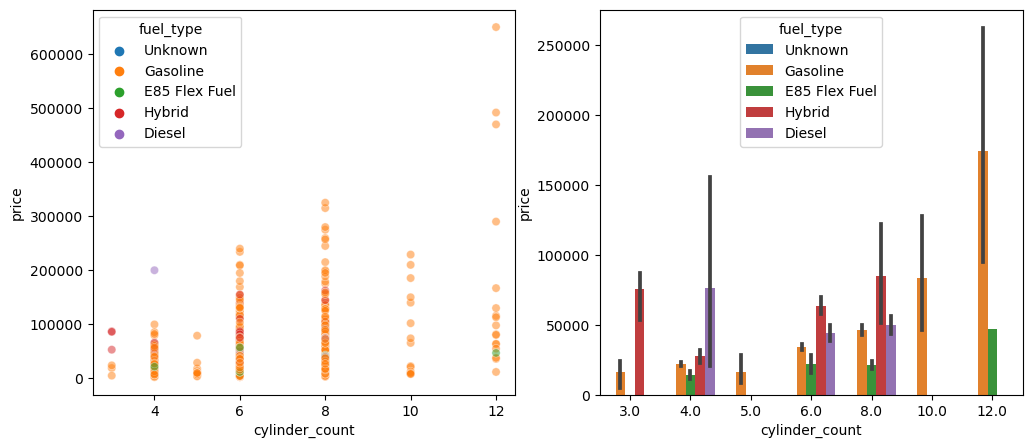

In [83]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(x='cylinder_count',y='price',data=train_df,hue='fuel_type',alpha=0.5,ax=axes[0])
sns.barplot(x='cylinder_count',y='price',data=train_df,hue='fuel_type',ax=axes[1])

In [87]:
train_df.groupby('fuel_type').mean(numeric_only=True)

,milage,price,car_age,horsepower,engine_size,cylinder_count
fuel_type,,,,,,
Diesel,85441.884615,49973.538462,7.666667,339.231884,5.436000,6.885714
E85 Flex Fuel,105286.662921,21641.438202,10.247191,312.550000,4.620455,7.075000
Gasoline,65569.916981,43163.377830,8.734434,329.469412,3.671520,6.265570
Hybrid,36804.906667,53603.386667,4.113333,317.608696,2.849194,5.313043
Unknown,38888.523438,54364.625000,8.203125,498.025316,1.100000,NaN


In [88]:
from sklearn.impute import SimpleImputer

In [89]:
impute_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

In [94]:
impute_mean.fit(train_df[['horsepower','engine_size','cylinder_count']])

SimpleImputer()

In [97]:
train_df[['horsepower','engine_size','cylinder_count']] = impute_mean.transform(train_df[['horsepower','engine_size','cylinder_count']])

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 3151 to 459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           2565 non-null   object 
 1   milage          2565 non-null   int64  
 2   fuel_type       2565 non-null   object 
 3   transmission    2565 non-null   object 
 4   ext_col         2565 non-null   object 
 5   int_col         2565 non-null   object 
 6   accident        2565 non-null   object 
 7   clean_title     2565 non-null   object 
 8   price           2565 non-null   int64  
 9   car_age         2565 non-null   int64  
 10  horsepower      2565 non-null   float64
 11  engine_size     2565 non-null   float64
 12  cylinder_count  2565 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 280.5+ KB


## Dealing With outliers